In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('processed_trends.csv').drop('Unnamed: 0', axis = 1)

In [3]:
df.head(3)

,HW_ratio,ID,absolute_trend_lenght,b,coordinates_X,coordinates_Y,dispersion,extremum_type,height,importance,k,peaks_count,r_squared_of_trend,tops_count,trend_class,trend_end,trend_start,width
0,0.001104,100000,5585.000084,220.482719,4720,221.735,1561.6,1,0.363141,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,329
1,0.001104,100000,5585.000084,220.482719,5199,221.735,1561.6,1,0.363141,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,329
2,0.002177,100000,5585.000084,220.482719,5440,221.670,1561.6,1,0.256925,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,118


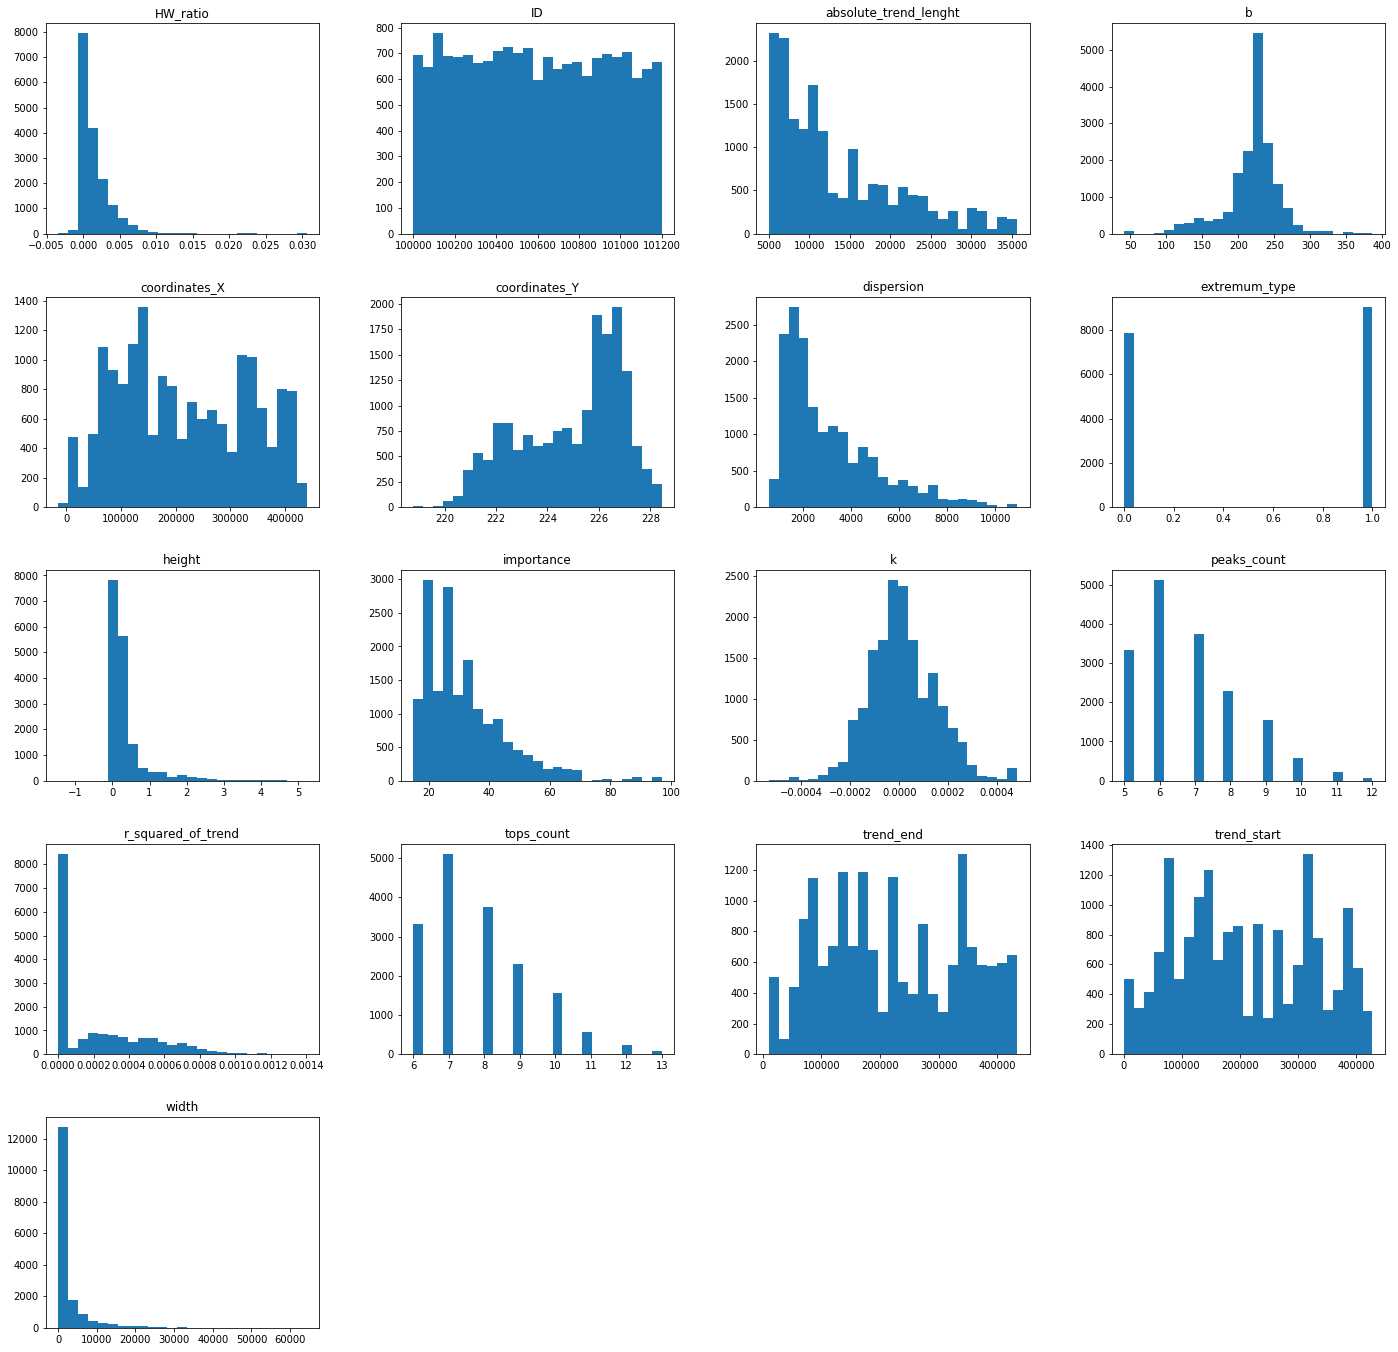

In [4]:
df.hist(bins=25, grid=False, figsize=(24,24))
plt.show()
plt.savefig('manyplots.png', dpi=300)

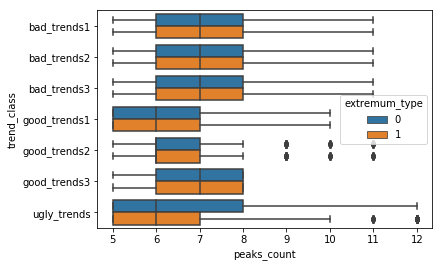

In [5]:
sns.boxplot(y="trend_class", x="peaks_count", hue='extremum_type', data=df)
plt.show()

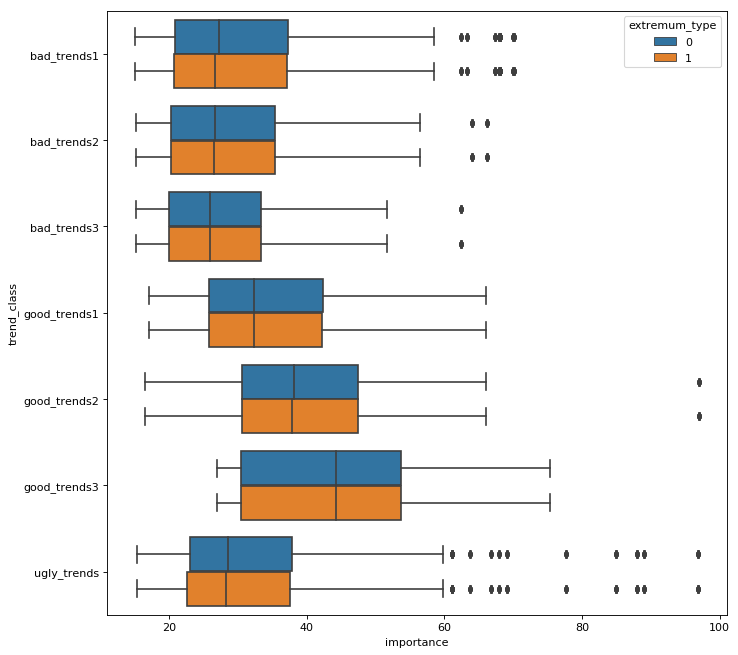

In [6]:
plt.figure(num=None, figsize=(10, 10), dpi=80)
sns.boxplot(y="trend_class", x="importance", hue='extremum_type', data=df)
plt.show()

In [7]:
df.head()

,HW_ratio,ID,absolute_trend_lenght,b,coordinates_X,coordinates_Y,dispersion,extremum_type,height,importance,k,peaks_count,r_squared_of_trend,tops_count,trend_class,trend_end,trend_start,width
0,0.001104,100000,5585.000084,220.482719,4720,221.735,1561.6,1,0.363141,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,329
1,0.001104,100000,5585.000084,220.482719,5199,221.735,1561.6,1,0.363141,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,329
2,0.002177,100000,5585.000084,220.482719,5440,221.670,1561.6,1,0.256925,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,118
3,0.001994,100000,5585.000084,220.482719,5578,221.660,1561.6,1,0.223324,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,112
4,0.000279,100000,5585.000084,220.482719,9050,223.430,1561.6,1,1.399538,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,5021


In [8]:
df['coordinates_X_d']=df['coordinates_X']-df['trend_start']
df['startend_d']=df['trend_end']-df['trend_start']

In [9]:
df.head()

,HW_ratio,ID,absolute_trend_lenght,b,coordinates_X,coordinates_Y,dispersion,extremum_type,height,importance,k,peaks_count,r_squared_of_trend,tops_count,trend_class,trend_end,trend_start,width,coordinates_X_d,startend_d
0,0.001104,100000,5585.000084,220.482719,4720,221.735,1561.6,1,0.363141,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,329,-329,5585
1,0.001104,100000,5585.000084,220.482719,5199,221.735,1561.6,1,0.363141,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,329,150,5585
2,0.002177,100000,5585.000084,220.482719,5440,221.670,1561.6,1,0.256925,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,118,391,5585
3,0.001994,100000,5585.000084,220.482719,5578,221.660,1561.6,1,0.223324,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,112,529,5585
4,0.000279,100000,5585.000084,220.482719,9050,223.430,1561.6,1,1.399538,21.458761,0.000171,6,0.000607,7,bad_trends1,10634,5049,5021,4001,5585


In [10]:
from sklearn.preprocessing import StandardScaler

#features = ['HW_ratio', 'absolute_trend_lenght', 'b', 'dispersion', 'height', 'importance', 'peaks_count', 
#            'extremum_type', 'k', 'r_squared_of_trend', 'width', 'startend_d', 'coordinates_X_d', 'coordinates_Y']

#not uesed: HW, startend, extr type, length
features = ['absolute_trend_lenght', 'b', 'importance', 'coordinates_X_d', 'coordinates_Y', 'dispersion', 'peaks_count',
            'k', 'r_squared_of_trend']
# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['trend_class']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)
df.loc[:, features]

,absolute_trend_lenght,b,importance,coordinates_X_d,coordinates_Y,dispersion,peaks_count,k,r_squared_of_trend
0,5585.000084,220.482719,21.458761,-329,221.735,1561.600000,6,0.000171,0.000607
1,5585.000084,220.482719,21.458761,150,221.735,1561.600000,6,0.000171,0.000607
2,5585.000084,220.482719,21.458761,391,221.670,1561.600000,6,0.000171,0.000607
3,5585.000084,220.482719,21.458761,529,221.660,1561.600000,6,0.000171,0.000607
4,5585.000084,220.482719,21.458761,4001,223.430,1561.600000,6,0.000171,0.000607
5,5585.000084,220.482719,21.458761,5582,222.330,1561.600000,6,0.000171,0.000607
6,5585.000084,220.482719,21.458761,5590,222.330,1561.600000,6,0.000171,0.000607
7,5585.000084,220.482719,21.458761,0,221.330,1561.600000,6,0.000171,0.000607
8,5585.000084,220.482719,21.458761,329,221.400,1561.600000,6,0.000171,0.000607
9,5585.000084,220.482719,21.458761,447,221.425,1561.600000,6,0.000171,0.000607


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])

In [12]:
finalDf = pd.concat([principalDf, df[['trend_class']]], axis = 1)

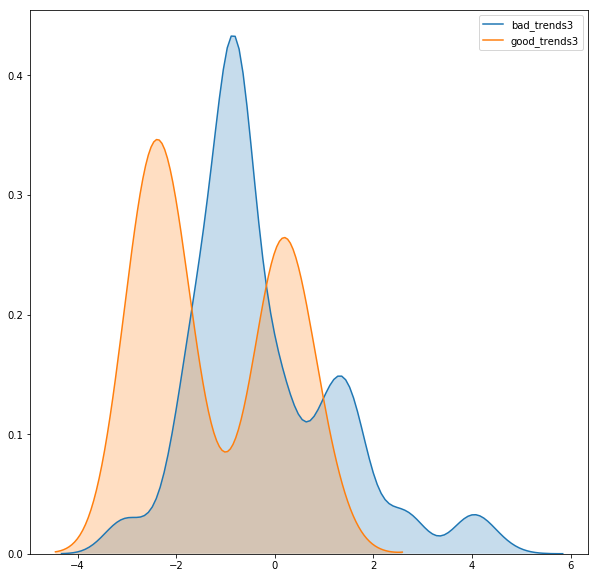

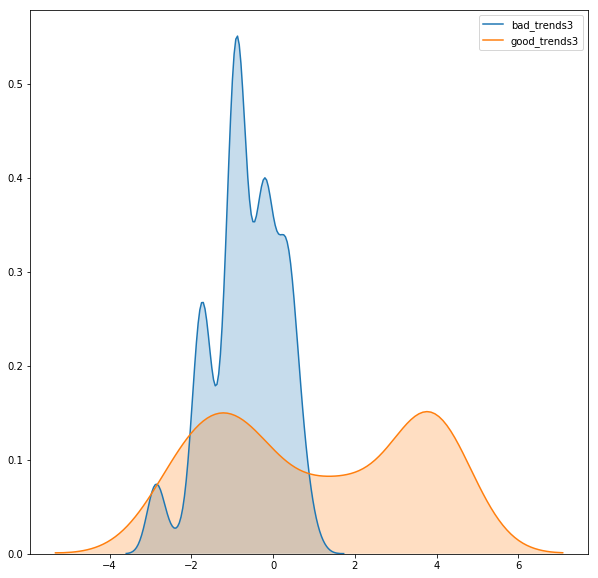

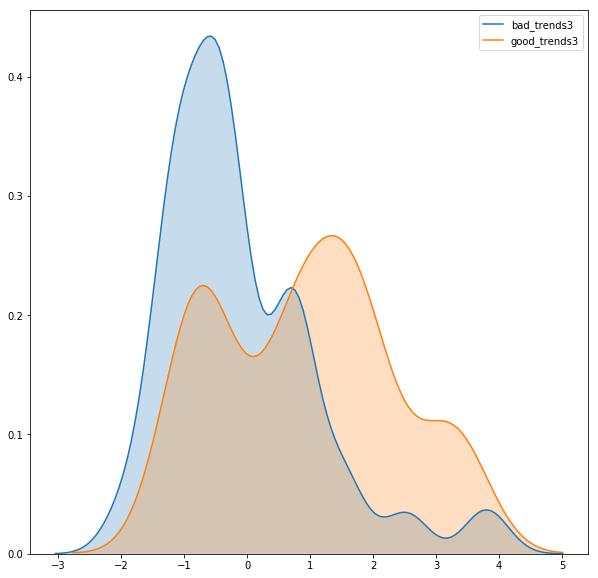

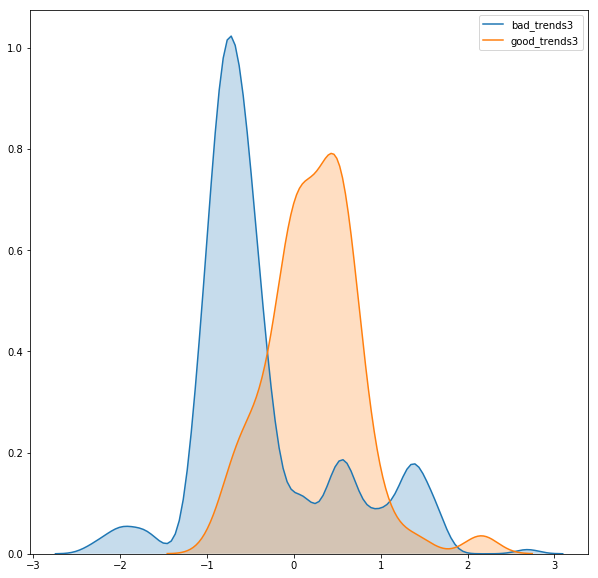

In [13]:
featurelist=principalDf.columns.tolist()
plt.rcParams["figure.figsize"] = [10,10]
type1DF=finalDf.loc[finalDf['trend_class'] == 'bad_trends3']
type2DF=finalDf.loc[finalDf['trend_class'] == 'good_trends3']
type3DF=finalDf.loc[finalDf['trend_class'] == 'good_trends2']
type4DF=finalDf.loc[finalDf['trend_class'] == 'bad_trends2']
for feature in featurelist:
    var1=type1DF[feature]
    var2=type2DF[feature]
    var3=type3DF[feature]
    var4=type4DF[feature]
    sns.kdeplot(var1, shade=True, label='bad_trends3')
    sns.kdeplot(var2, shade=True, label='good_trends3')
    #sns.kdeplot(var4, shade=True, label='bad_trends2')
    #sns.kdeplot(var3, shade=True, label='good_trends2')
    plt.show()

In [14]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

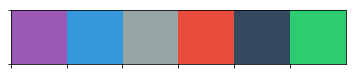

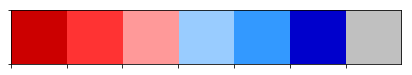

In [15]:
flatui = ["#cc0000", "#ff3333", "#ff9999", "#99ccff", "#3399ff", "#0000cc", "#c0c0c0"]
sns.palplot(sns.color_palette(flatui))
plt.show()

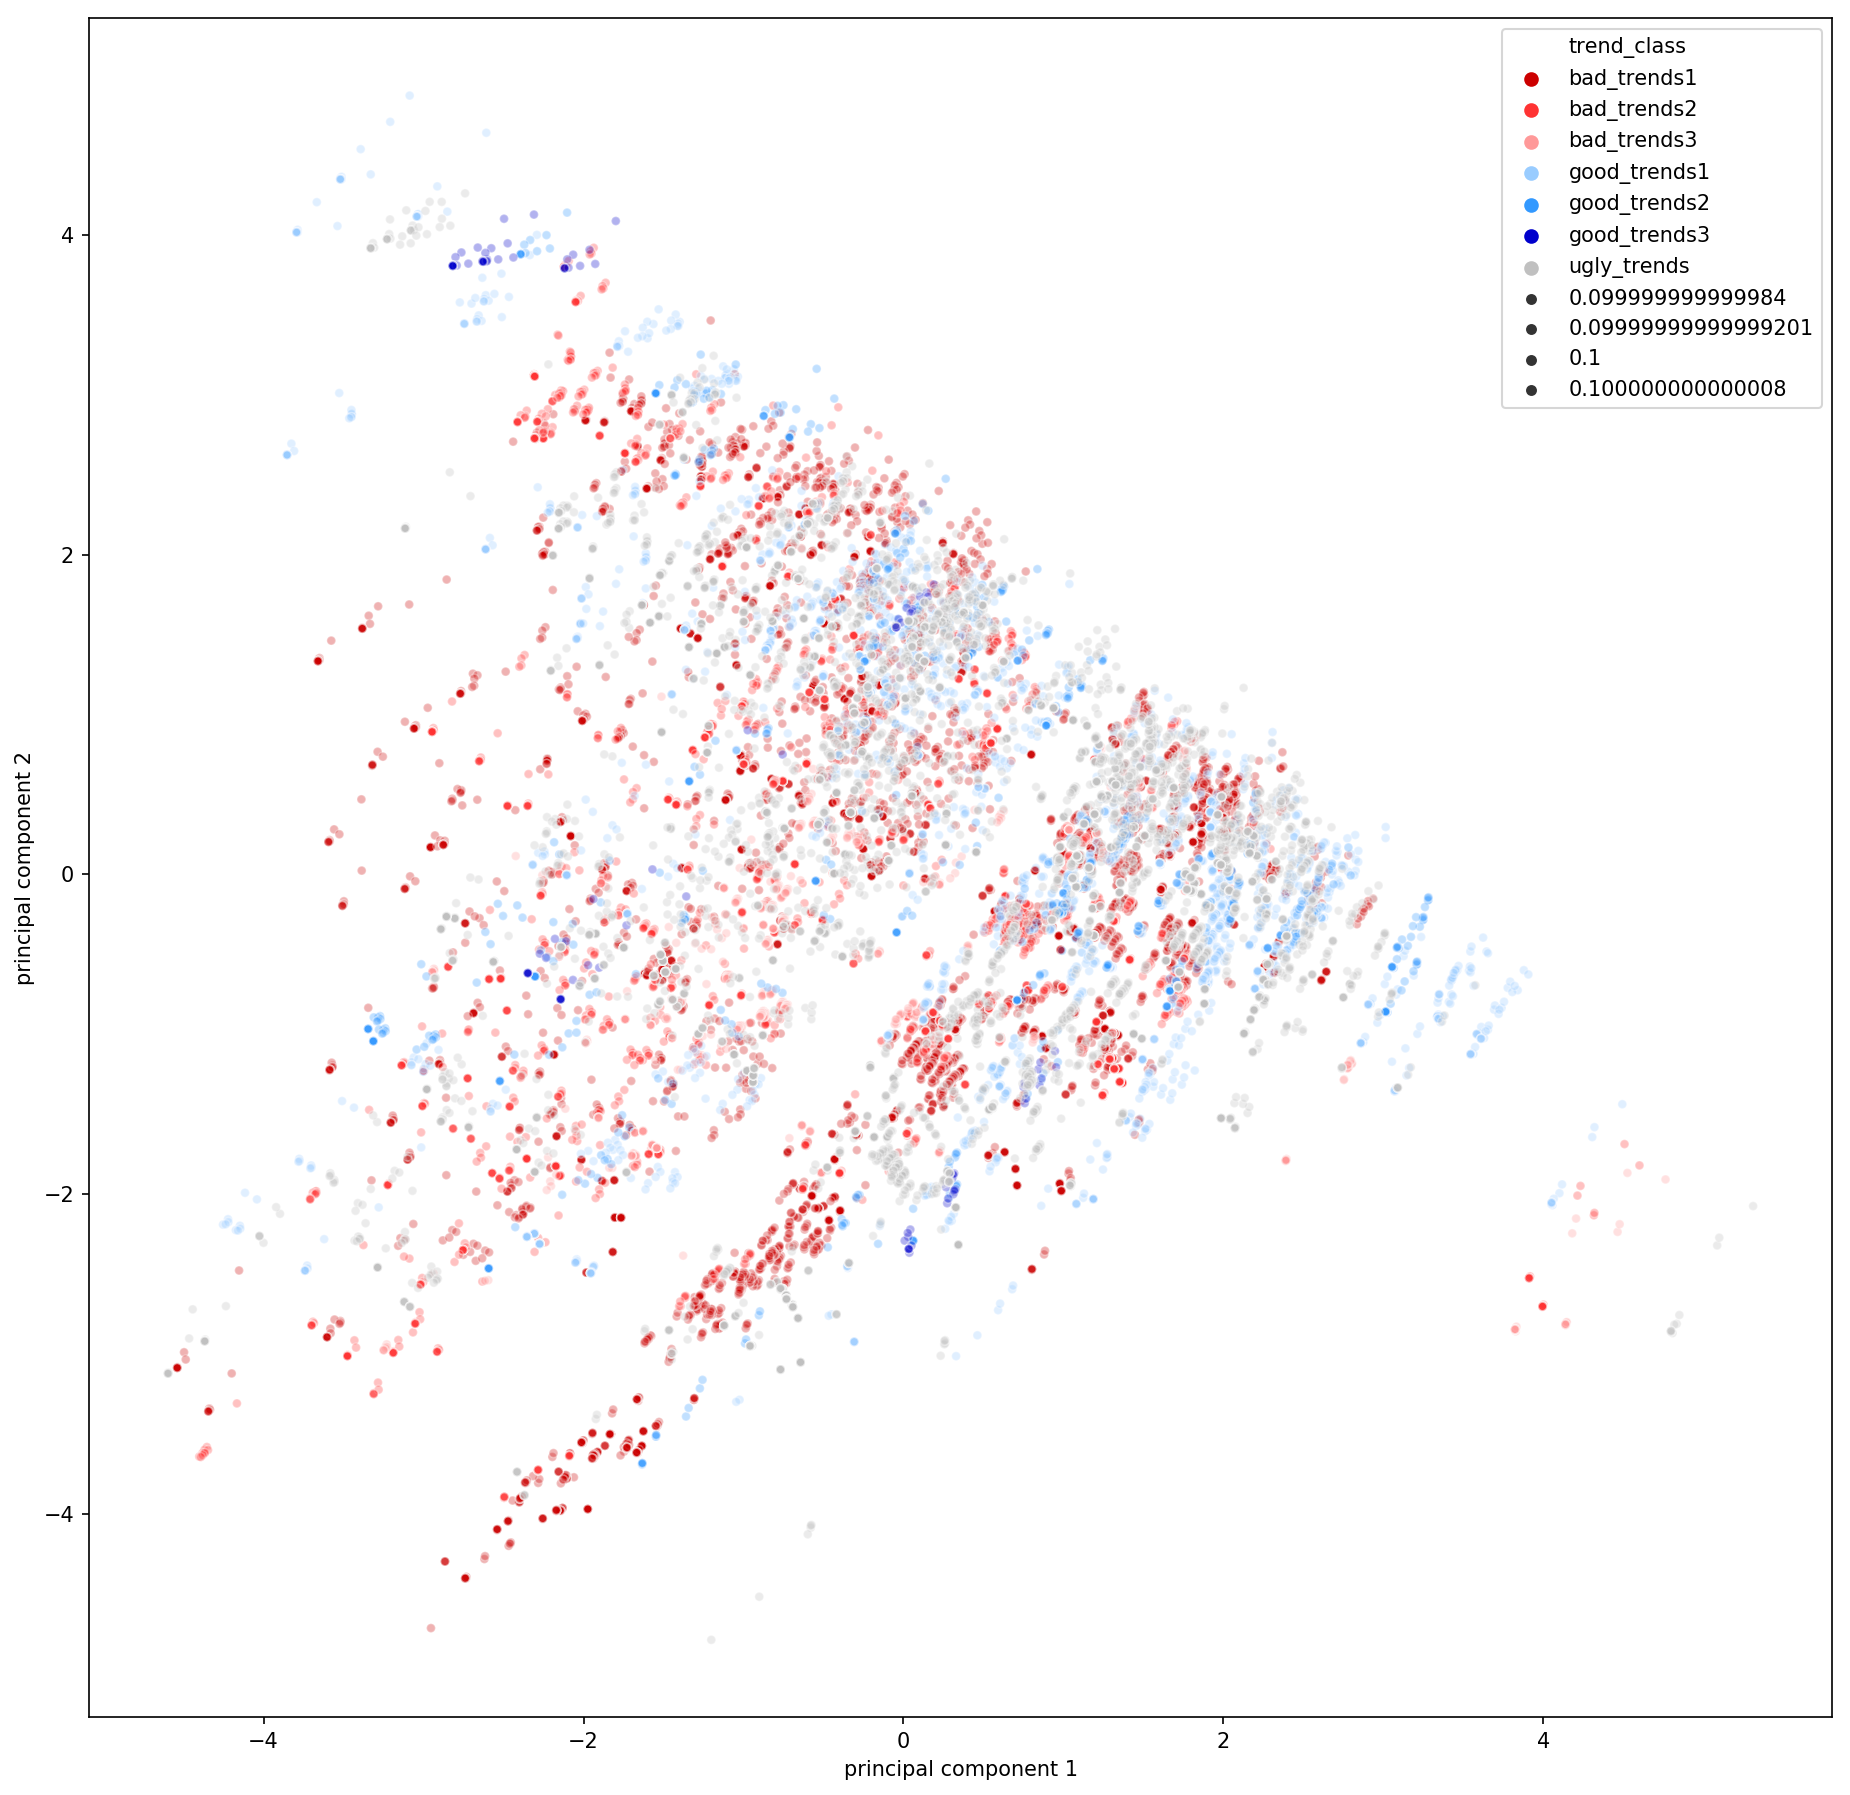

In [16]:
plt.figure(num=None, figsize=(15, 15), dpi=150)
sns.scatterplot(y='principal component 2', x='principal component 1', hue='trend_class', palette=sns.color_palette(flatui), size=0.1, alpha=0.3, data=finalDf)
plt.show()

In [17]:
mapping = {'bad_trends3': 1, 'bad_trends2': 2, 'bad_trends1':3, 'bad_trends3':4, 'good_trends1':5, 'good_trends2':6, 'good_trends3':7, 'ugly_trends':0}
df=df.replace({'trend_class': mapping})

In [22]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, df[['trend_class']], test_size=0.2, random_state=42)

names = ["Nearest Neighbors",
         "Decision Tree", "Neural Net",
         "Naive Bayes", "OneVsRestClassifier", 'OneVsRestClassifierLogisticRegression', "LinearSVC" ]
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=1000),
    # hidden_layer_sizes=(10000) alpha=0.001 learning_rate_init=0.001 max_iter=2000 for 71
#   GaussianNB(), 
    OneVsRestClassifier(DecisionTreeClassifier()), 
    OneVsRestClassifier(MLPClassifier()),
    LinearSVC()]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)   
    print(name)
    print(score)
    print("f1_score: " + str(f1_score(y_test, y_pred, average="macro")))
    print("precision_score: " + str(precision_score(y_test, y_pred, average="macro")))
    print("recall_score: " + str(recall_score(y_test, y_pred, average="macro")))  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Nearest Neighbors
0.8979893554109994
f1_score: 0.8896712091733481
precision_score: 0.896940750767989
recall_score: 0.883901886688195
Decision Tree
0.8985807214665879
f1_score: 0.9094154199224738
precision_score: 0.9075069299424411
recall_score: 0.9115167629445521
Neural Net
0.6836191602602011
f1_score: 0.687399784162056
precision_score: 0.7521663894588564
recall_score: 0.6578003556884354
Naive Bayes
0.8560023654642224
f1_score: 0.7678351843655101
precision_score: 0.7783567836874317
recall_score: 0.8621463755560766
OneVsRestClassifier
0.5706682436428149
f1_score: 0.5292575013133558
precision_score: 0.6490620704701462
recall_score: 0.5026666006058195


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


OneVsRestClassifierLogisticRegression
0.33737433471318745
f1_score: 0.11883937509852373
precision_score: 0.09641045649629341
recall_score: 0.1579039109789115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, df[['trend_class']], test_size=0.2, random_state=42)

names = ["Neural",
         "Neural", "Neural Net",
         "Neural", "Neural", 'Neural', "Neural" ]
classifiers = [
    MLPClassifier(hidden_layer_sizes=(5000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=6000),
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=3000),
    MLPClassifier(hidden_layer_sizes=(20000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=5000),
    MLPClassifier(hidden_layer_sizes=( ми), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.01, power_t=0.5, max_iter=10000), 
    MLPClassifier(hidden_layer_sizes=(2000), activation='relu', 
                  solver='adam', alpha=0.001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=1000), 
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.0001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=3000),
    MLPClassifier(hidden_layer_sizes=(10000), activation='relu', 
                  solver='adam', alpha=0.00001, batch_size='auto', 
                  learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=3000)
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)   
    print(name)
    print(score)
    print("f1_score: " + str(f1_score(y_test, y_pred, average="macro")))
    print("precision_score: " + str(precision_score(y_test, y_pred, average="macro")))
    print("recall_score: " + str(recall_score(y_test, y_pred, average="macro")))  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.663217031342401
f1_score: 0.6427553554854754
precision_score: 0.7281134326136368
recall_score: 0.6396019762756584


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.6354228267297457
f1_score: 0.6421223138609335
precision_score: 0.6507849524431444
recall_score: 0.6485592031411588


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Net
0.6995860437610881
f1_score: 0.7059291061923133
precision_score: 0.7059359677413812
recall_score: 0.7195024381076359


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.676227084565346
f1_score: 0.6836988834205091
precision_score: 0.6914168470055791
recall_score: 0.6849173595096938


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.6898285038438794
f1_score: 0.6955741959047353
precision_score: 0.7011789918180314
recall_score: 0.7021142993914858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.7123004139562389
f1_score: 0.7084073062028929
precision_score: 0.7272293046971224
recall_score: 0.7195623819613205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural
0.6969248965109403
f1_score: 0.701096037224244
precision_score: 0.7348788681084321
recall_score: 0.6981664377283191


In [19]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, df[['trend_class']], test_size=0.2, random_state=58)

names = ["Nearest Neighbors",
         "Decision Tree"]
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    ]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    print(name)
    print(score)
    print("f1_score: " + str(f1_score(y_test, y_pred, average="macro")))
    print("precision_score: " + str(precision_score(y_test, y_pred, average="macro")))
    print("recall_score: " + str(recall_score(y_test, y_pred, average="macro")))  

Nearest Neighbors
0.9036073329390893
f1_score: 0.8848104656484322
precision_score: 0.9037172530919813
recall_score: 0.870007564565502
Decision Tree
0.8982850384387936
f1_score: 0.8932817160306897
precision_score: 0.891838048224343
recall_score: 0.8949954130102908


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, features], df[['trend_class']], test_size=0.2, random_state=58)
X_test

,absolute_trend_lenght,b,importance,coordinates_X_d,coordinates_Y,dispersion,peaks_count,k,r_squared_of_trend
974,9863.000018,221.796236,36.534462,9575,226.740,2159.714286,8,0.000058,0.000245
15806,8857.000268,137.610857,32.974295,1926,220.720,1880.222222,7,0.000245,0.000273
14641,5214.000025,202.466181,31.913145,5214,226.675,1143.666667,7,0.000095,0.000223
12931,8193.000033,236.970528,28.630836,161,226.880,1716.960000,6,-0.000090,0.000000
11485,6860.000236,131.182467,29.166668,6783,222.620,1411.200000,6,0.000264,0.000322
16809,34807.000255,175.583494,26.432988,31453,227.700,9217.611111,7,0.000121,0.000358
10223,15119.000146,267.102047,42.741620,264,222.560,2476.111111,7,-0.000139,0.000000
12556,18850.000007,224.123626,50.120019,331,226.705,3384.875000,9,0.000027,0.000669
12290,9533.000021,221.172345,52.638215,9513,226.845,1629.937500,9,0.000066,0.000504
8360,16216.000037,248.221990,25.822961,-142,223.390,4395.777778,7,-0.000068,0.000000


In [21]:
X_test

,absolute_trend_lenght,b,importance,coordinates_X_d,coordinates_Y,dispersion,peaks_count,k,r_squared_of_trend
974,9863.000018,221.796236,36.534462,9575,226.740,2159.714286,8,0.000058,0.000245
15806,8857.000268,137.610857,32.974295,1926,220.720,1880.222222,7,0.000245,0.000273
14641,5214.000025,202.466181,31.913145,5214,226.675,1143.666667,7,0.000095,0.000223
12931,8193.000033,236.970528,28.630836,161,226.880,1716.960000,6,-0.000090,0.000000
11485,6860.000236,131.182467,29.166668,6783,222.620,1411.200000,6,0.000264,0.000322
16809,34807.000255,175.583494,26.432988,31453,227.700,9217.611111,7,0.000121,0.000358
10223,15119.000146,267.102047,42.741620,264,222.560,2476.111111,7,-0.000139,0.000000
12556,18850.000007,224.123626,50.120019,331,226.705,3384.875000,9,0.000027,0.000669
12290,9533.000021,221.172345,52.638215,9513,226.845,1629.937500,9,0.000066,0.000504
8360,16216.000037,248.221990,25.822961,-142,223.390,4395.777778,7,-0.000068,0.000000
